In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import json, os, time

import pyautogui
from PIL import Image
import cv2
import numpy as np
from dotenv import load_dotenv
import openai

from prompts import *
from GUIUtils import *
from GUIToolbox import LightroomGUIToolBox
from Chat import AgentClient
from ChatClaude import ClaudeAgentClient
from cognitive_architecture import adjustment_routing_woKI

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
openai.api_key = api_key

## First Step: Set the window, set clibration points for automated GUI operations
Set up window and calibration points for automated GUI control
This step needs to be done once and the configuration will be saved for future use
Steps:
1. Position and size the Lightroom window appropriately 
2. Follow prompts to calibrate control points for automation
3. Configuration will be saved to a file for reuse
4. Remeber to give terminal right to control your computer

In [11]:
# GUI_config_file = "./GUI_config_half.json"
GUI_config_file = "./GUI_config_1.json"
# GUI_config_file = "./GUI_config.json"
update_setting_image = 'UpdateSetting.png'

if os.path.exists(GUI_config_file):
    print(f"Configuration file '{GUI_config_file}' found. Loading...")
    with open(GUI_config_file, "r") as config_file:
        GUI_config = json.load(config_file)
else:
    button_image = os.path.abspath("./button.png")
    color_button_image = os.path.abspath("./color-button.png")
    HDPI = 2
    background_color = [26, 26, 26]
    pannel_and_histogram_area = set_calibration_points()
    slider_positions = record_slider_positions(button_image)
    color_slider_positions = record_color_slider_positions(color_button_image)
    GUI_config = create_toolbox_config_template(button_image, color_button_image, HDPI, background_color, pannel_and_histogram_area, slider_positions, color_slider_positions)
    with open(GUI_config_file, "w") as config_file:
        json.dump(GUI_config, config_file, indent=4)

Configuration file './GUI_config_1.json' found. Loading...


### Run test to control the GUI Lightroom

In [ ]:
skip_legacy_setting_button(update_setting_image, GUI_config)
set_slider_positions(test_parameters_2, GUI_config)
set_slider_positions(test_parameters_3, GUI_config)
set_slider_positions(test_parameters_1, GUI_config)

set_color_slider_positions(color_test_parameters_2, GUI_config)
set_color_slider_positions(color_test_parameters_3, GUI_config)
set_color_slider_positions(color_test_parameters_1, GUI_config)

## Test single image

In [ ]:
skip_legacy_setting_button(update_setting_image, GUI_config)
set_slider_positions(test_parameters_1, GUI_config)
set_color_slider_positions(color_test_parameters_1, GUI_config)

In [15]:
exp_index = 31

output_dir_path = f"./test-output/P./test-output/PhotoArtAgent_V.Jan5_woKI_artistic_emphasis/test_image_withcolor_{exp_index}"
GUIToolbox = LightroomGUIToolBox(GUI_config, output_dir_path, image_name=f"test_image{exp_index}", clip_history_messages=True)
global_style = photo_editing_global_styles["artistic_emphasis"]

User messgae file path: /Users/haoyu/Research/Retouching/AgentRetouching-main 2/test-output/P./test-output/PhotoArtAgent_V.Jan5_woKI_artistic_emphasis/test_image_withcolor_31/user_messages.json


### Claude

In [16]:

from ChatClaude import ClaudeAgentClient

chat_client = ClaudeAgentClient(api_key=anthropic_api_key, 
                                model='claude-3-sonnet-20240229', 
                                toolbox_instance=GUIToolbox, 
                                debug=False)


If you need to view the messages. Now select the output messages.json file on the server.

In [ ]:
adjustment_routing_woKI(chat_client, 
                        GUIToolbox, 
                        global_style=global_style, 
                        retry=5)

`func_return_responses`, response: 

1. **Image Content Description:** The image captures a majestic mountain landscape with snow-capped peaks towering over a lush, green valley. A winding river meanders through the meadow, surrounded by dense forests. Blooming trees in the foreground add a touch of vibrant color.

2. **General Requirements for Retouching Approaches:**
*Light Adjustments:* Exposure, contrast, highlights, shadows, blacks, and whites adjustments will vary based on the desired mood and effect.
*Color Adjustments:* The overall color temperature, tint, vibrance, and saturation will be tailored to match the emotional tone of each retouching approach.
*Individual Color Adjustments:* Specific hues like green, blue, and white may be adjusted in saturation and luminance to enhance or subdue their presence.

3. **Retouching Approaches:**

*Approach 1 (Balanced/Subtle):* Maintain natural lighting with a slight increase in exposure and contrast. Preserve vibrant greens and blues wh

### ChatGPT

In [64]:

from Chat import AgentClient

chat_client = AgentClient(api_key=openai_api_key, 
                          model='gpt-4o-2024-11-20', 
                          toolbox_instance=GUIToolbox, 
                          debug=False)


============== image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ============================= image_retouching_content_analyzer_and_approaches_thoughts_prompt ===============
=========== past_messages ===================== p
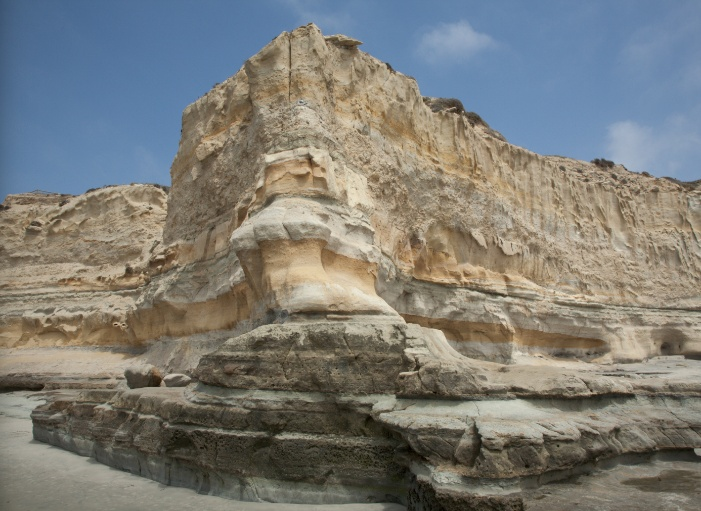

Parameters: {
  "model": "gpt-4o-2024-11-20",
  "messages": [
    {
      "role": "system",
      "content": "**Character**\nYou are a professional image retouching artist with expert knowledge in enhancing images by adjusting light and color. Your task is to analyze the content of an image and propose multiple retouching approaches, each highlighting different aspects and evoking distinct moods.\n**Background**\nThis image is part of a creative project where adjustments to light and color are explored to improve its visual appeal and emotional impact.\n**Ambition**\nYour goal is to propose three distinct retouching approaches for the image. All adjustments must focus on **Light** (exposure, contrast, highlights, shadows, blacks, and whites), **Color** (temperature, tint, vibrance, and saturation), and **individual color tones** (Red, Orange, Yellow, Green, Cyan, Blue, Purple, Magenta). At least one approach must be bold and exaggerated to create a dramatic effect.\n**Task**\n1. **Imag
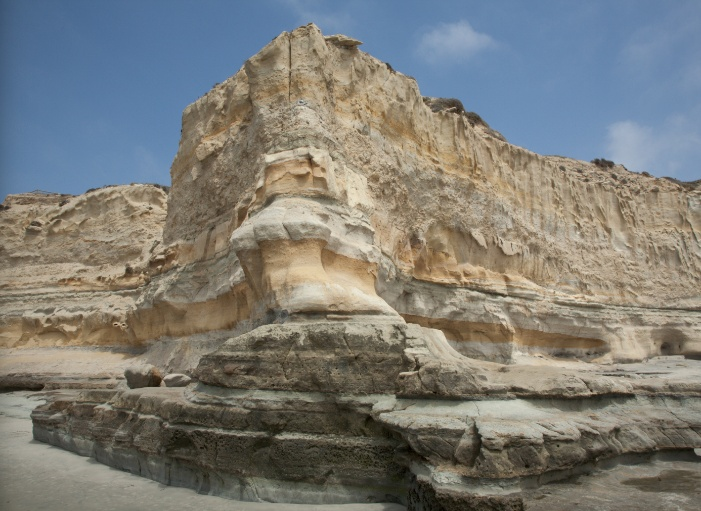
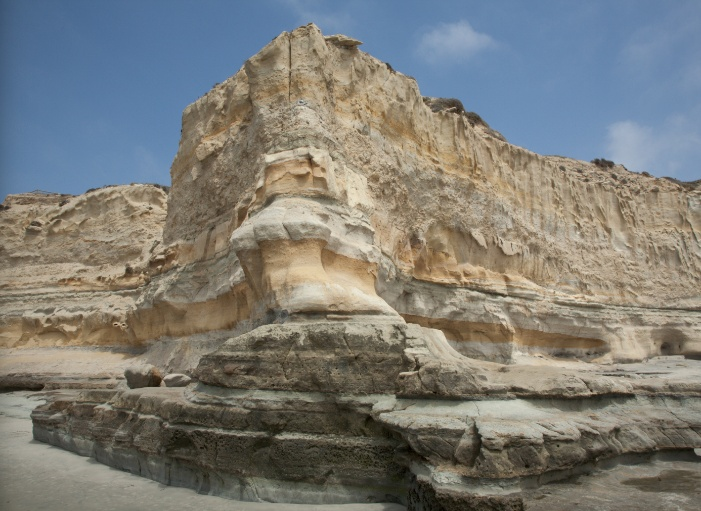

Parameters: {
  "model": "gpt-4o-2024-11-20",
  "messages": [
    {
      "role": "system",
      "content": "**Character**\nYou are a professional image retouching artist tasked with finalizing a single retouching approach based on the user's preferences and previous proposals. Your expertise ensures that the final approach integrates key aspects from different suggestions or follows a single selected approach in full.\n**Background**\nThe user has reviewed previous retouching approaches and provided feedback or specific instructions for a final retouching plan that aligns with their creative goals.\n**Ambition**\nYour goal is to either choose one of the previously proposed approaches that best matches the user's vision or create a new, cohesive retouching approach by combining elements from different suggestions. Ensure that the final approach fully respects the user's instructions and creative intent.\n**User Instruction**\nUser says: \"['Enhance the image with a focus on visual sto
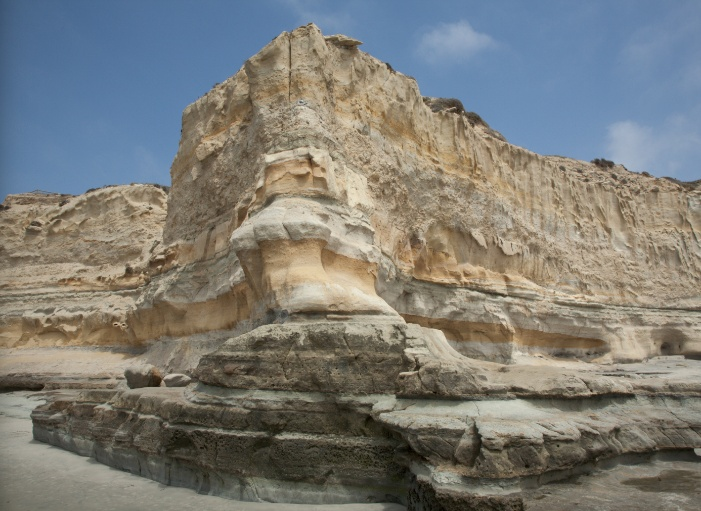
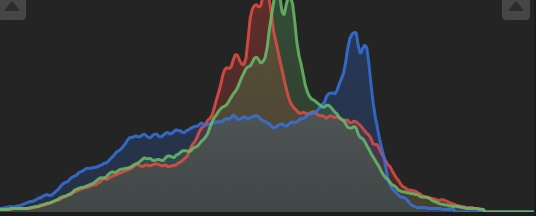

Parameters: {
  "model": "gpt-4o-2024-11-20",
  "messages": [
    {
      "role": "system",
      "content": "**Character**\nYou are a skilled image processing expert specializing in histogram analysis for deriving insights and improvement directions in photo editing. Your expertise lies in identifying key histogram features that are directly relevant to adjustments in Light (exposure, contrast, highlights, shadows, blacks, whites) and Color (temperature, tint, vibrance, saturation).\n**Background**\nThis histogram represents the tonal distribution of an image, including shadows, midtones, and highlights. Your goal is to interpret the histogram and identify features that guide light and color adjustments to improve the image's visual quality.\n**Ambition**\nYour objective is to focus on key histogram characteristics—such as spikes, gaps, or shifts—that inform light and color adjustments. These insights will help refine exposure, balance contrast, and enrich color distribution for an op
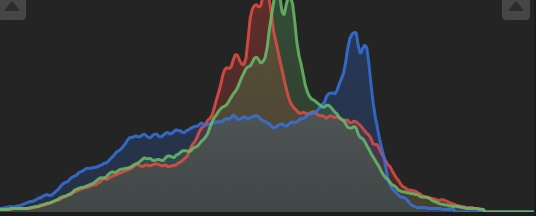

Parameters: {
  "model": "gpt-4o-2024-11-20",
  "messages": [
    {
      "role": "system",
      "content": "You are a highly experienced and professional image retouching assistant with expert knowledge in Adobe Lightroom and image processing techniques.\nYour role is to assist the user in achieving their desired image retouching outcomes by selecting and suggesting appropriate settings for image adjustments.\nThe user may provide specific functions they wish to adjust, and you will be required to:\n- Understand the purpose behind each adjustment.\n- Select the most appropriate parameters for the specified function.\n- Explain the reasoning behind the parameter selections.\n- Describe how the selected parameters will impact the final image, ensuring that they align with the user’s visual goals.\n- Keep your suggestions concise, professional, and aligned with the user’s expectations.\n- Provide explanations that are clear and easy to understand, while offering expertise in retouching 
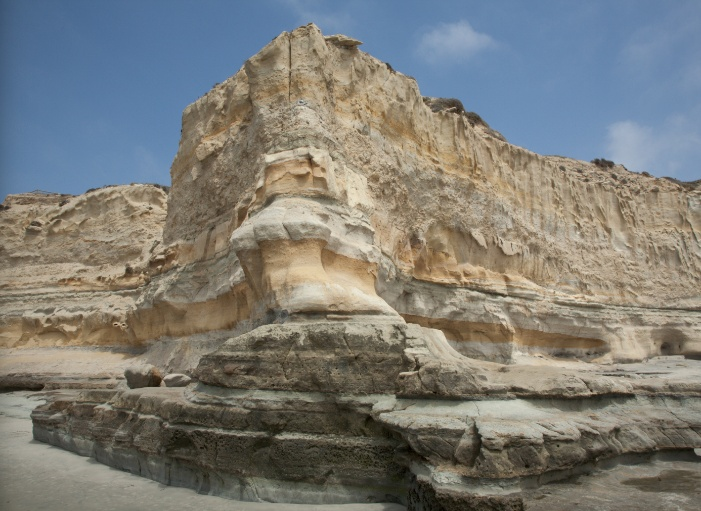

None
===================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI ========================================== retouching_reflection_system_prompt_GUI =====================
Parameters: {
  "model": "gpt-4o-2024-11-20",
  "messages": [
    {
      "role": "system",
      "content": "**Character**\nAs a professional image retouching eval
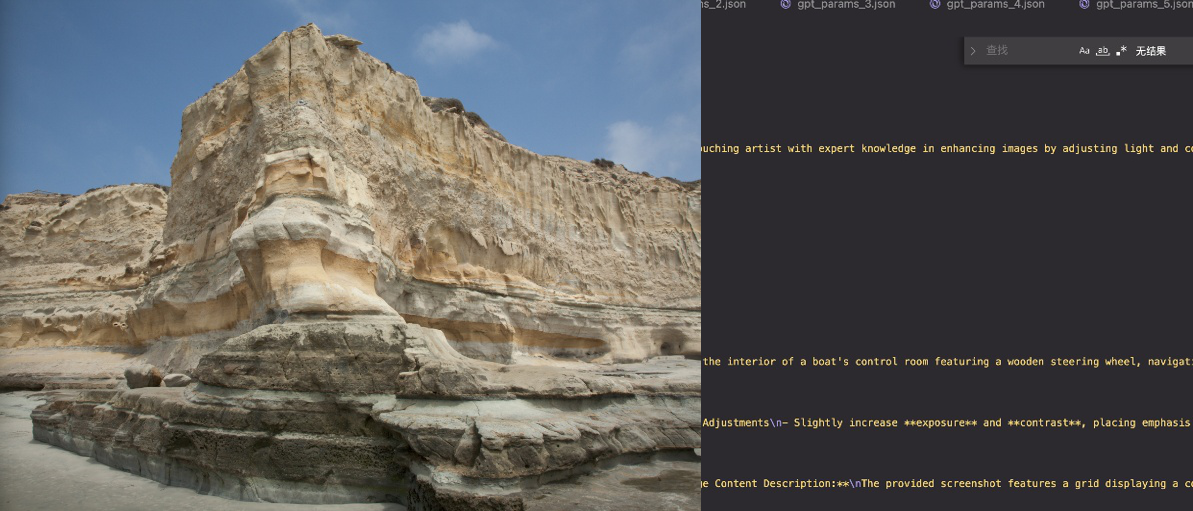
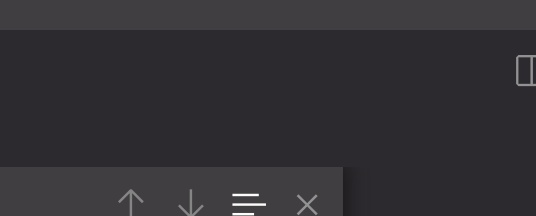

KeyboardInterrupt: 

In [65]:
adjustment_routing_woKI(chat_client, GUIToolbox, global_style=global_style, retry=2)

## Run batch images

In [ ]:
processing_image_number = 114
for i in range(processing_image_number):
    exp_index = i
    skip_legacy_setting_button(update_setting_image, GUI_config)
    set_slider_positions(test_parameters_1, GUI_config)
    set_color_slider_positions(color_test_parameters_1, GUI_config)
    output_dir_path = f"./test-output/PhotoArtAgent_V.Jan5_woKI/test_image_withcolor_{exp_index}"
    GUIToolbox = LightroomGUIToolBox(GUI_config, output_dir_path, image_name=f"test_image{exp_index}", clip_history_messages=True)
    chat_client = AgentClient(api_key=api_key, toolbox_instance=GUIToolbox, debug=False)
    global_style = photo_editing_global_styles["artistic_emphasis"]

    adjustment_routing_woKI(chat_client, GUIToolbox, global_style=global_style, retry=5)

    time.sleep(2)
    pyautogui.press('right')
    time.sleep(1)